## Part 1. Preliminary data analysis

### 1.0 Data preparation

In [265]:
# Importing all required modules
# Disabling warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Importing plotting modules and setting them up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.sigure_format = 'retina'

In [266]:
# Tuning the visual settings for figures in 'seaborn' and 'matplotlib' in general
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)


from matplotlib import rcParams
rcParams["figure.figsize"]= 11, 8

In [267]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [268]:
df = pd.read_csv(DATA_PATH+"mlbootcamp5_train.csv", sep=";")
print("Dataser size:",df.shape)
df.head()

Dataser size: (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [269]:
# Converting the data into long format
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0,1])
    .rename(columns={"value":"count"})
    .reset_index()
)
df_uniques

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


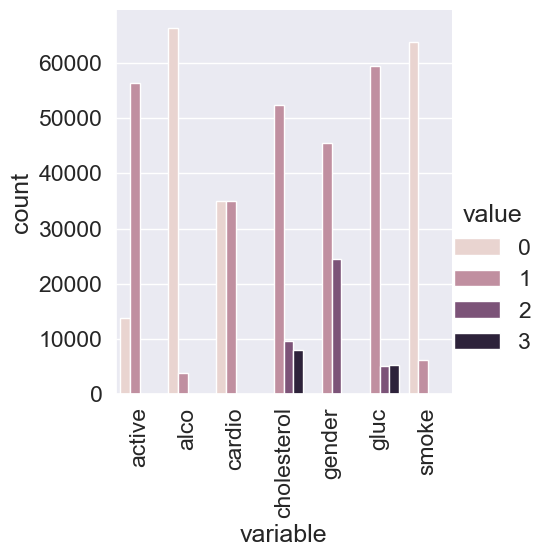

In [270]:
# Depicting the value counts of the categorical features
sns.catplot(
    data=df_uniques, x="variable", y="count", hue="value",  kind="bar"
)
plt.xticks(rotation="vertical");

In [271]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable","value","cardio"])["value"].count())
    .sort_index(level=[0,1])
    .rename(columns={"value":"count"})
    .reset_index()
)
df_uniques

,variable,value,cardio,count
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,1,0,29330
9,cholesterol,1,1,23055


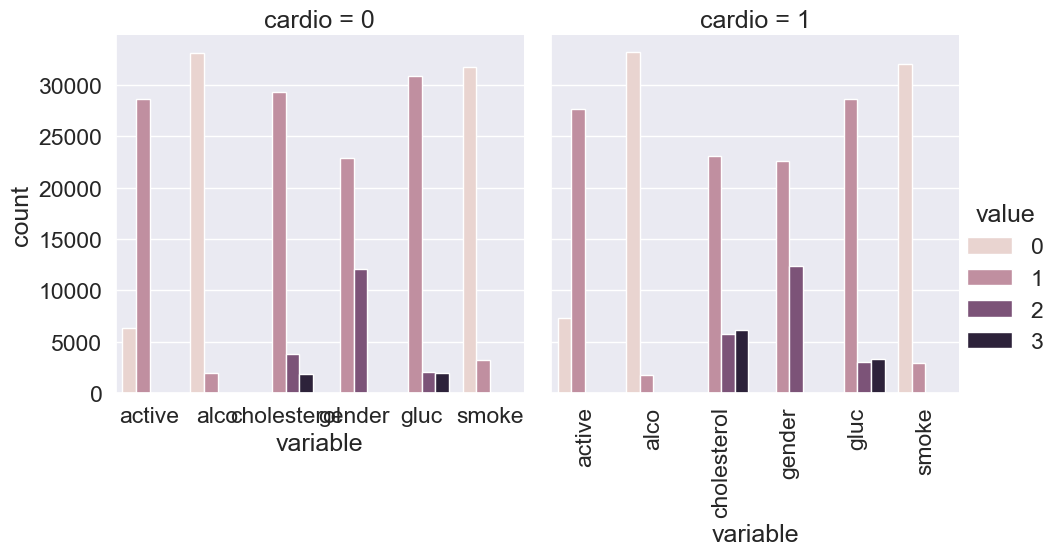

In [272]:
# Plotting the data
sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar"
)
plt.xticks(rotation="vertical");

In [273]:
# Calculating some statistics for the feature unique values
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n<=3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


### 1.1 Basic observations

#### Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

In [274]:
# Grouping by "gender" and calculating both the mean height and the count for each group
df_gender = df.groupby("gender").agg(
    average_height=("height", "mean"),
    count=("gender", "count")
).sort_values(by="average_height")

df_gender


,average_height,count
gender,,
1,161.355612,45530
2,169.947895,24470


In [275]:
# As dataframe is sorted we can identify women by index
women = df_gender.iloc[0]
print('There are',int(women['count']),'women in the dataset',
      'with an average height of',int(women["average_height"]))

There are 45530 women in the dataset with an average height of 161


In [276]:
# The output of the answer for men
men = df_gender.iloc[1]
print('There are',int(men['count']),'men in the dataset',
      'with an average height of',int(men["average_height"]))

There are 24470 men in the dataset with an average height of 169


In [277]:
# We save the named index of female and male gender fo further use
women_index = df_gender.index[0]
men_index = df_gender.index[1]

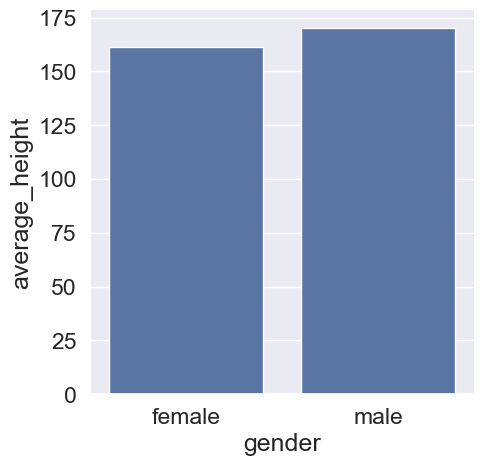

In [278]:
# We can now relabel the genders in our data for better data interpretation
df_gender_summary = df_gender.rename(index={men_index:"male", women_index:"female"})



# Visualization of the data
sns.catplot(
    data = df_gender_summary,
    x = "gender",
    y = "average_height",
    kind="bar"

);

#### Question 1.2. (1 point). Who more often report consuming alcohol – men or women?

In [292]:
# Formatting the data
gender_map = {men_index:"male", women_index:"female"}
df_labeled = df.copy()
df_labeled["gender"] = df_labeled["gender"].map(gender_map)
df_labeled

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,male,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,female,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,male,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,female,163,72.0,135,80,1,2,0,0,0,1


In [298]:

# Extracting the necessary data
df_alco_intake_by_gen = (
    pd.DataFrame(df_labeled[["gender", "alco"]]
    .groupby("gender")["alco"]
    .mean())
)


In [299]:
# Access the alcohol intake for each gender based on the `gender` column values
fem_intake = df_alco_intake_by_gen.loc["female"]["alco"].round(3)
mal_intake = df_alco_intake_by_gen.loc["male"]["alco"].round(3)

df_alco_intake_by_gen

,alco
gender,
female,0.025500
male,0.106375


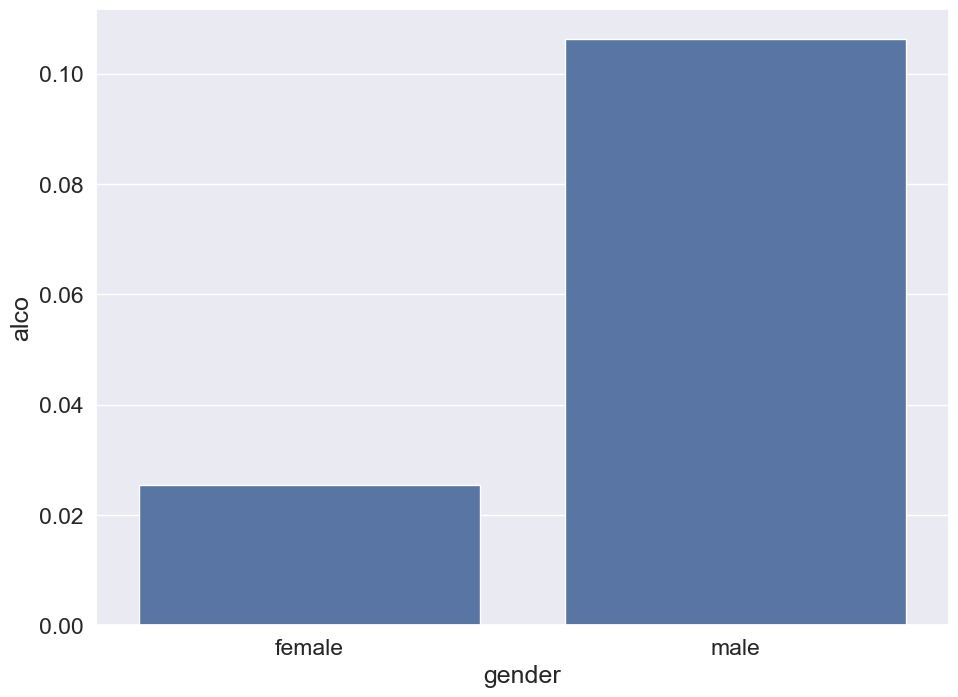

In [300]:
# Visualizing the data we got
sns.barplot(data=df_alco_intake_by_gen, x="gender", y="alco");

In [322]:
if mal_intake>fem_intake:
    print("Men report consuming alcohol more often")
elif fem_intake>mal_intake:
    print("Women report consuming alcohol more often")
else:
    print("Both genders report the same alcohol consumption")

Men report consuming alcohol more often


#### Question 1.3. (1 point). What’s the rounded difference between the percentages of smokers among men and women?

In [308]:
df_gendered_smokers = df_labeled.groupby("gender").agg(
    total = ("gender", "count"),
    smoke = ("smoke", "sum")
)

df_gendered_smokers

,total,smoke
gender,,
female,45530,813
male,24470,5356


In [315]:
percentages = df_gendered_smokers
df_gendered_smokers["smoke_percent"] = (df_gendered_smokers["smoke"]/df_gendered_smokers["total"])*100
df_gendered_smokers

,total,smoke,smoke_percent
gender,,,
female,45530,813,1.785636
male,24470,5356,21.888026


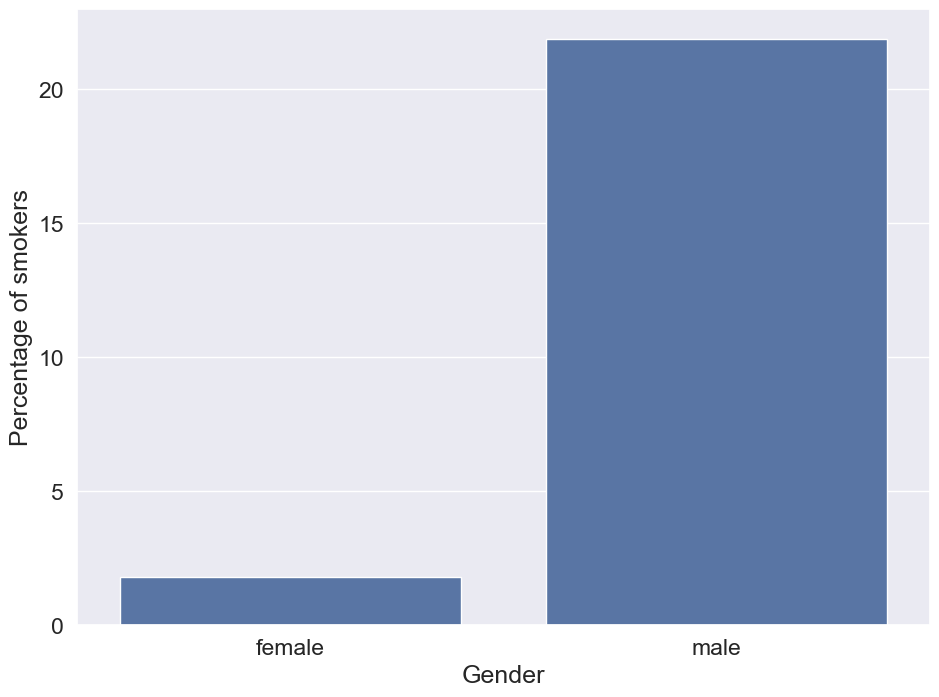

In [326]:
# Visualization for better interpretation
ax = sns.barplot(
    data = df_gendered_smokers,
    y = "smoke_percent",
    x = "gender"
)
ax.set(xlabel="Gender", ylabel="Percentage of smokers");

In [321]:
abs_diff = abs(df_gendered_smokers.loc["male",'smoke_percent'] - df_gendered_smokers.loc["female", 'smoke_percent']).round(0)

print("The rounded difference between the percentages of smokers among men and women is:",
abs_diff)

The rounded difference between the percentages of smokers among men and women is: 20.0


#### Question 1.4. (1 point). What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

In [335]:
df_smokers_by_age = pd.DataFrame(df.groupby("smoke")["age"].median())
age_diff_smoke = abs(df_smokers_by_age.loc[0,"age"]-df_smokers_by_age.loc[1,"age"])
age_diff_months =(age_diff_smoke/30).round()
print("The rounded difference between median values of age (in months) for non-smokers and smokers is",
age_diff_months)

20.0
